# Ouliers

In [1]:
! pip install prophet==1.1.5 plotly

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prophet import Prophet

CSV_PATH_BR_LAND_TEMP = './data/processed/brazil_land_temp.csv'

df_br = pd.read_csv(CSV_PATH_BR_LAND_TEMP, 
                    parse_dates=['dt'])

df_br.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
0,1832-01-01,24.935,1.372,Brazil,1
1,1832-02-01,24.505,1.953,Brazil,2
2,1832-03-01,24.617,1.359,Brazil,3
3,1832-04-01,23.990,2.013,Brazil,4
4,1832-05-01,23.124,1.592,Brazil,5


In [3]:
df_train = pd.DataFrame()

df_train['ds'] = df_br.loc[:2000 - 1, 'dt']
df_train['y'] = df_br.loc[:2000 - 1, 'AverageTemperature']

print(df_train.shape)
df_train.head()

(2000, 2)


,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [4]:
df_test = pd.DataFrame()

df_test['ds'] = df_br.loc[2000:, 'dt']
df_test['y'] = df_br.loc[2000:, 'AverageTemperature']

print(df_test.shape)
df_test.head()

(164, 2)


,ds,y
2000,2000-01-01,25.653
2001,2000-02-01,25.463
2002,2000-03-01,25.446
2003,2000-04-01,25.102
2004,2000-05-01,24.614


In [7]:
model = Prophet()

model.fit(df_train)

df_future = model.make_future_dataframe(periods=150, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:43:43 - cmdstanpy - INFO - Chain [1] start processing
17:43:43 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,23.959367,23.976995,25.109163,23.959367,23.959367,0.607761,0.607761,0.607761,0.607761,0.607761,0.607761,0.0,0.0,0.0,24.567128
1,1832-02-01,23.960482,23.950325,25.096160,23.960482,23.960482,0.591749,0.591749,0.591749,0.591749,0.591749,0.591749,0.0,0.0,0.0,24.552231
2,1832-03-01,23.961524,23.758173,24.880458,23.961524,23.961524,0.369199,0.369199,0.369199,0.369199,0.369199,0.369199,0.0,0.0,0.0,24.330724
3,1832-04-01,23.962639,23.261989,24.405801,23.962639,23.962639,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,-0.147005,0.0,0.0,0.0,23.815634
4,1832-05-01,23.963718,22.573871,23.758454,23.963718,23.963718,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,-0.783976,0.0,0.0,0.0,23.179742


In [14]:
filter_yhat_lower_limit = (df_train['y'] > predicions.loc[:1999, 'yhat_lower'])
filter_yhat_upper_limit = (df_train['y'] < predicions.loc[:1999, 'yhat_upper'])

no_outliers = df_train[filter_yhat_lower_limit & filter_yhat_upper_limit]

no_outliers.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [15]:
df_no_outliers = no_outliers[['ds', 'y']]

df_no_outliers.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


In [16]:
model = Prophet()

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=0)

predicions = model.predict(df_future)

predicions.head()

17:50:55 - cmdstanpy - INFO - Chain [1] start processing
17:50:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.035532,24.322185,25.062005,24.035532,24.035532,0.654518,0.654518,0.654518,0.654518,0.654518,0.654518,0.0,0.0,0.0,24.690050
1,1832-02-01,24.036363,24.226184,24.940600,24.036363,24.036363,0.542862,0.542862,0.542862,0.542862,0.542862,0.542862,0.0,0.0,0.0,24.579225
2,1832-03-01,24.037140,24.012689,24.717911,24.037140,24.037140,0.334967,0.334967,0.334967,0.334967,0.334967,0.334967,0.0,0.0,0.0,24.372107
3,1832-04-01,24.037971,23.509009,24.197885,24.037971,24.037971,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,0.0,0.0,0.0,23.855842
4,1832-05-01,24.038775,22.964021,23.670911,24.038775,24.038775,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,0.0,0.0,0.0,23.320393


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([22., 23., 24., 25., 26., 27.]),
 [Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27')])

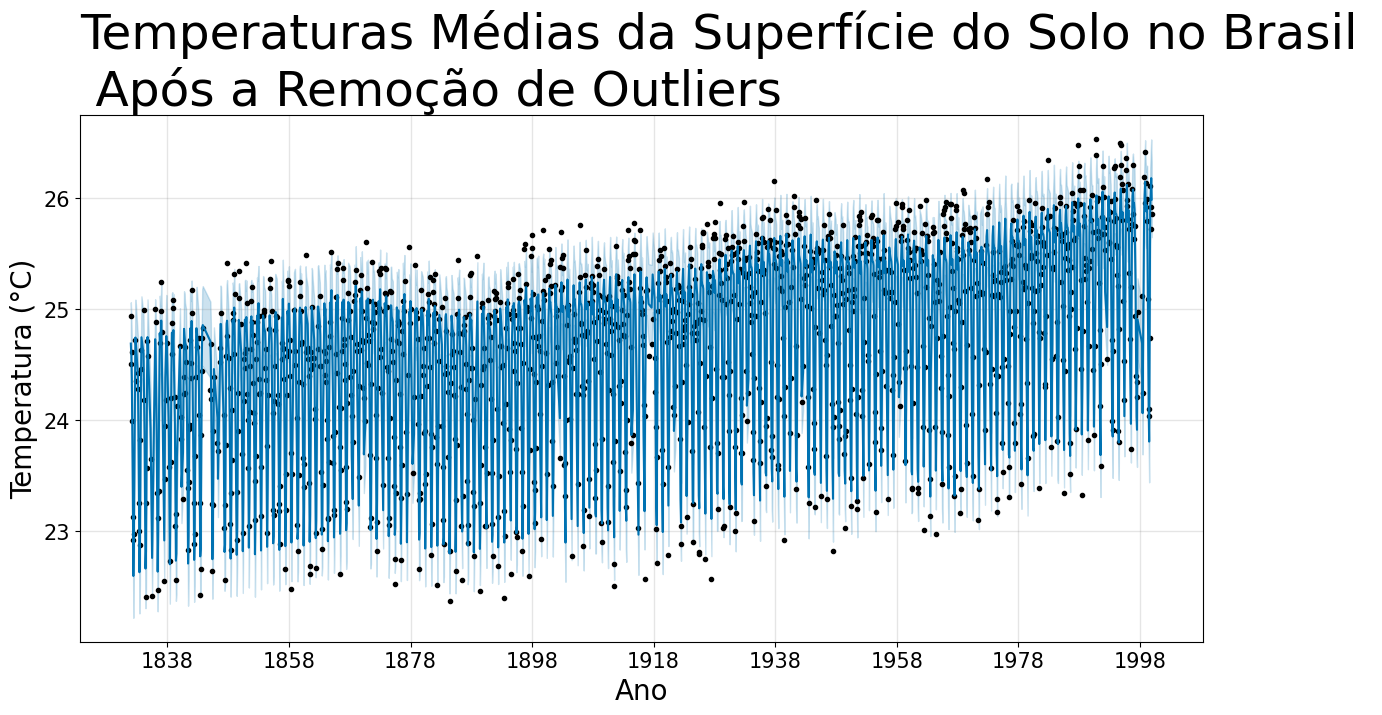

In [17]:
model.plot(predicions, figsize=(12,6))

plt.title('Temperaturas Médias da Superfície do '
          'Solo no Brasil \n Após a Remoção de Outliers', 
          loc='left', 
          fontsize=35)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_no_outliers['y'], predicions.loc[:1629, 'yhat'])

0.07646936465057107

## Intervalo de confiança

In [23]:
model = Prophet(interval_width=.8) # default

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=300, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:55:11 - cmdstanpy - INFO - Chain [1] start processing
17:55:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.035532,24.351653,25.055424,24.035532,24.035532,0.654518,0.654518,0.654518,0.654518,0.654518,0.654518,0.0,0.0,0.0,24.690050
1,1832-02-01,24.036363,24.234075,24.912168,24.036363,24.036363,0.542862,0.542862,0.542862,0.542862,0.542862,0.542862,0.0,0.0,0.0,24.579225
2,1832-03-01,24.037140,24.023222,24.740006,24.037140,24.037140,0.334967,0.334967,0.334967,0.334967,0.334967,0.334967,0.0,0.0,0.0,24.372107
3,1832-04-01,24.037971,23.472005,24.217130,24.037971,24.037971,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,0.0,0.0,0.0,23.855842
4,1832-05-01,24.038775,22.973934,23.669126,24.038775,24.038775,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,0.0,0.0,0.0,23.320393


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([22., 23., 24., 25., 26., 27., 28.]),
 [Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27'),
  Text(0, 28.0, '28')])

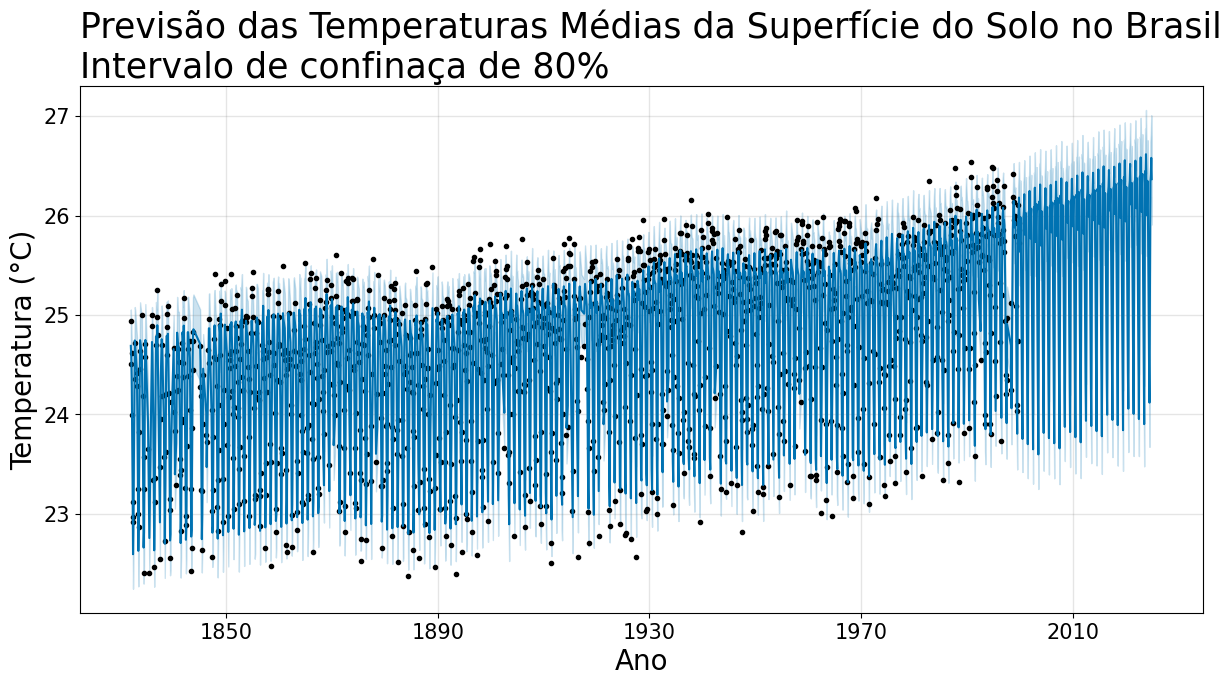

In [24]:
model.plot(predicions, figsize=(12,6))

plt.title('Previsão das Temperaturas Médias da Superfície do '
          'Solo no Brasil\nIntervalo de confinaça de 80%', 
          loc='left', 
          fontsize=25)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

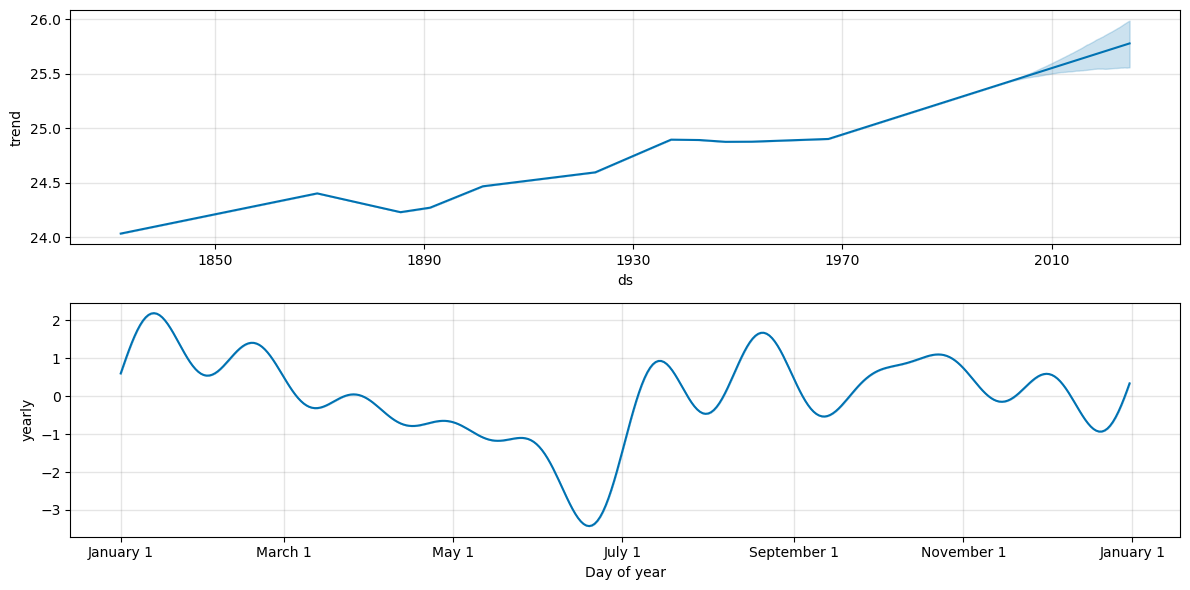

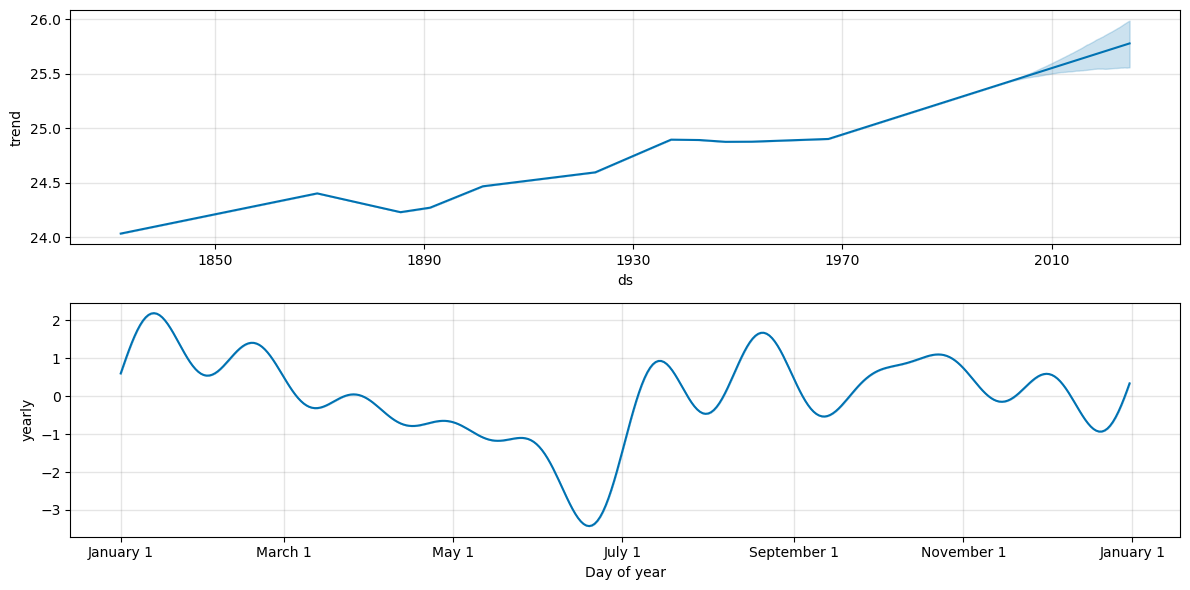

In [25]:
model.plot_components(predicions, figsize=(12, 6))

In [26]:
model = Prophet(interval_width=.95)

model.fit(df_no_outliers)

df_future = model.make_future_dataframe(periods=300, freq='M')

predicions = model.predict(df_future)

predicions.head()

17:57:05 - cmdstanpy - INFO - Chain [1] start processing
17:57:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1832-01-01,24.035532,24.171190,25.212325,24.035532,24.035532,0.654518,0.654518,0.654518,0.654518,0.654518,0.654518,0.0,0.0,0.0,24.690050
1,1832-02-01,24.036363,24.024866,25.179402,24.036363,24.036363,0.542862,0.542862,0.542862,0.542862,0.542862,0.542862,0.0,0.0,0.0,24.579225
2,1832-03-01,24.037140,23.864161,24.898769,24.037140,24.037140,0.334967,0.334967,0.334967,0.334967,0.334967,0.334967,0.0,0.0,0.0,24.372107
3,1832-04-01,24.037971,23.352752,24.383807,24.037971,24.037971,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,-0.182128,0.0,0.0,0.0,23.855842
4,1832-05-01,24.038775,22.796453,23.842461,24.038775,24.038775,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,-0.718382,0.0,0.0,0.0,23.320393


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(array([21., 22., 23., 24., 25., 26., 27., 28.]),
 [Text(0, 21.0, '21'),
  Text(0, 22.0, '22'),
  Text(0, 23.0, '23'),
  Text(0, 24.0, '24'),
  Text(0, 25.0, '25'),
  Text(0, 26.0, '26'),
  Text(0, 27.0, '27'),
  Text(0, 28.0, '28')])

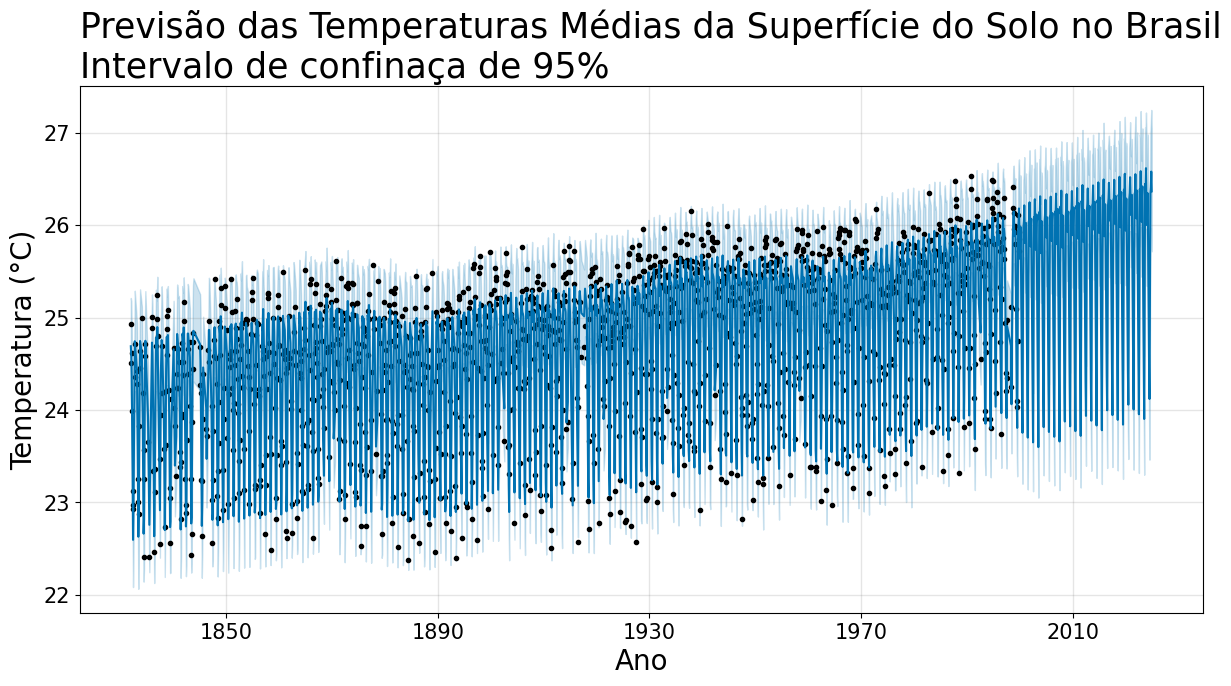

In [29]:
model.plot(predicions, figsize=(12,6))

plt.title('Previsão das Temperaturas Médias da Superfície do '
          'Solo no Brasil\nIntervalo de confinaça de 95%', 
          loc='left', 
          fontsize=25)

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

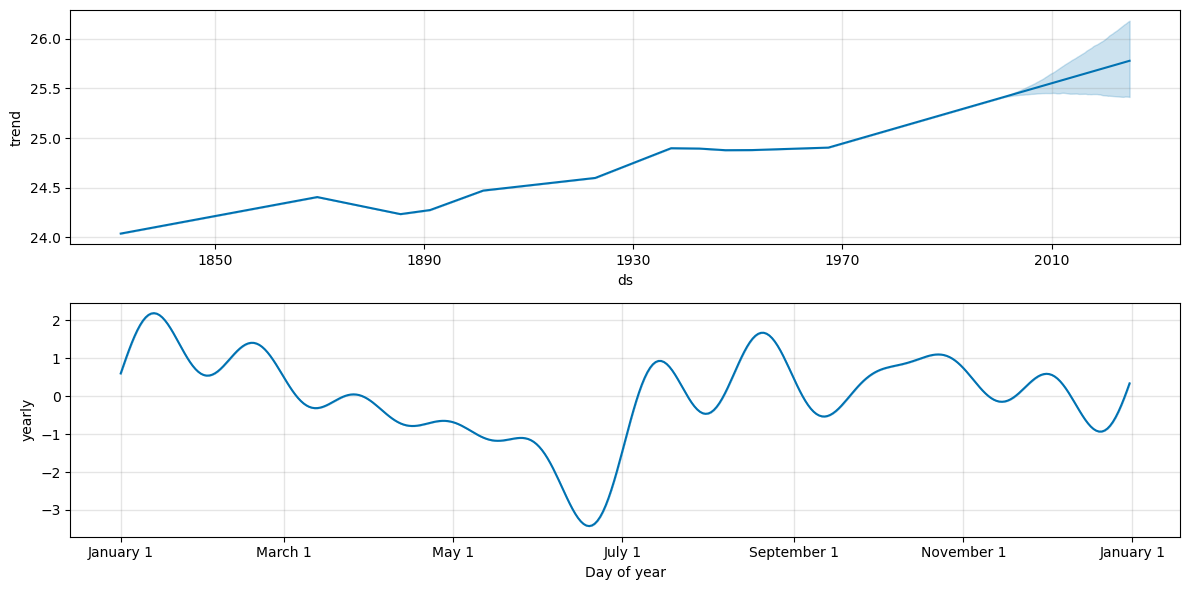

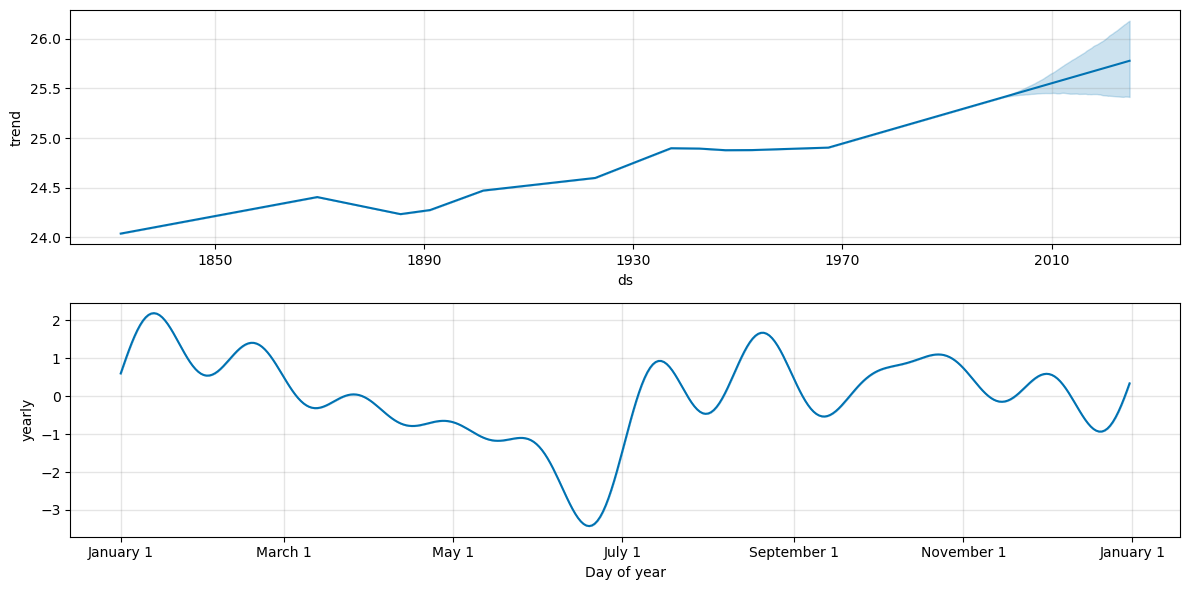

In [30]:
model.plot_components(predicions, figsize=(12, 6))

In [32]:
samples = model.predictive_samples(predicions)

samples

{'yhat': array([[25.2958009 , 24.29491793, 24.8273702 , ..., 24.23201575,
         24.82960451, 24.49107606],
        [24.77722908, 24.41831895, 24.60638051, ..., 24.43203453,
         24.61583215, 24.66657408],
        [24.17994419, 24.33333669, 24.51848201, ..., 24.22636547,
         23.94509675, 24.55185195],
        ...,
        [26.99771628, 26.25711562, 26.39219771, ..., 26.13565484,
         26.51803452, 26.65380622],
        [27.07276537, 26.70368031, 26.54585171, ..., 26.57674909,
         26.1102596 , 26.42413993],
        [26.86354881, 26.34269955, 26.54765562, ..., 26.65352094,
         26.14452677, 26.58105491]]),
 'trend': array([[24.03553203, 24.03553203, 24.03553203, ..., 24.03553203,
         24.03553203, 24.03553203],
        [24.03636284, 24.03636284, 24.03636284, ..., 24.03636284,
         24.03636284, 24.03636284],
        [24.03714005, 24.03714005, 24.03714005, ..., 24.03714005,
         24.03714005, 24.03714005],
        ...,
        [26.27959278, 25.81604418, 25

(array([23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ]),
 [Text(0, 23.5, '23.5'),
  Text(0, 24.0, '24.0'),
  Text(0, 24.5, '24.5'),
  Text(0, 25.0, '25.0'),
  Text(0, 25.5, '25.5'),
  Text(0, 26.0, '26.0'),
  Text(0, 26.5, '26.5'),
  Text(0, 27.0, '27.0')])

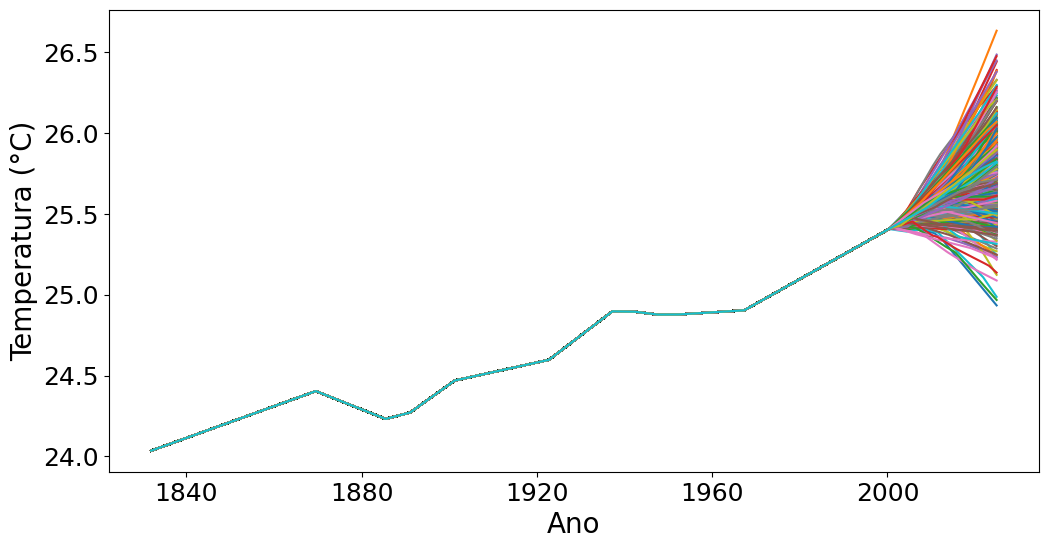

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))

ax = plt.plot(predicions['ds'],
                   samples['trend'])

plt.xlabel('Ano', fontsize=20)
plt.ylabel('Temperatura (°C)', fontsize=20)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)